## Please change the input file to simulate on different data set:- 
### 1. On given input data 
### 2. After balancing input data
### 3. After removing outliers
### 4. After removing outliers and balancing data

In [39]:
import csv
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import random
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score


# Load the dataset
#------------------------------------------------- IMPORTANT ------------------------------------------------------------------------
#data = pd.read_csv('./Csv Files/InputData.csv')
#data = pd.read_csv('./Csv Files/BalancedInputData.csv')

# SWAGAT_INPUT_income_dataset_non_balanced file is formed after removing outlier , code of removing outlier is in file Filter by income
#data = pd.read_csv('./Csv Files/SWAGAT_INPUT_income_dataset_non_balanced.csv') 
# below file is formed after removing outliers and balancing dataset
data = pd.read_csv('./Csv Files/SWAGAT_INPUT_income_dataset_balanced.csv')

## Split as train and test

In [40]:
# Define the target variable
target_variable = 'Risk_Flag'
# Separate features (X) and target variable (y)
X = data.drop(columns=[target_variable])  # Features
y = data[target_variable]                 # Target

# Split the dataset into training (30,000 samples) and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Concatenate X_train and y_train along columns to create the training dataset
train_data = pd.concat([X_train, y_train], axis=1)

# Display the shapes of the split datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Save the training dataset (features + target) and test dataset (features) to CSV files
train_data.to_csv('./Csv Files/Train_Data.csv', index=False)
X_test.to_csv('./Csv Files/Test_Data.csv', index=False)

# Save the target variable for the test dataset to a CSV file
y_test.to_csv('./Csv Files/Test_Target.csv', index=False, header=True)


X_train shape: (31413, 12)
X_test shape: (3491, 12)
y_train shape: (31413,)
y_test shape: (3491,)


## Training data

In [41]:
data = pd.read_csv('./Csv Files/Train_Data.csv');
print("is data clean :- " , data.notnull().values.all())  # data is clean
#print("risk :- \n",data["Risk_Flag"].value_counts())
input_data1 = data.copy()
input_data1.drop(['CITY','STATE','Risk_Flag'],axis = 1 ,inplace = True)

# Married 

input_data1['Married/Single'] = input_data1['Married/Single'].apply(lambda x : 1 if  x == 'married' else 0 )
print(input_data1['Married/Single'].value_counts())

# House ownership

#print(input_data1['House_Ownership'].value_counts())
ownership_mapping = {'rented': 0, 'norent_noown': 1, 'owned': 2}
input_data1['House_Ownership'] = input_data1['House_Ownership'].map(ownership_mapping)
print(input_data1['House_Ownership'].value_counts())

# car ownership 
input_data1['Car_Ownership'].value_counts()
input_data1['Car_Ownership'] = input_data1['Car_Ownership'].apply(lambda x : 1 if  x == 'yes' else 0 )
print(input_data1['Car_Ownership'].value_counts())


# Profession 

input_data1['Profession'] = input_data1['Profession'].str.replace('_', ' ')

print("number of professions :- ",input_data1['Profession'].nunique())

average_income_by_profession = input_data1.groupby('Profession')['Income'].mean()
# Format the numbers without scientific notation and with commas as thousand separators
average_income_by_profession = average_income_by_profession.apply(lambda x: "{:,.2f}".format(x))

#print("average salary of each profession :-\n ",average_income_by_profession)

# Create a mapping for encoding based on average income
profession_encoding = dict(zip(average_income_by_profession.sort_values().index, range(input_data1['Profession'].nunique())))
#print(profession_encoding)

# Save the DataFrame to a CSV file this will be used to encoding test data based on training data
df = pd.DataFrame(list(profession_encoding.items()), columns=['Profession', 'Rank'])
df.to_csv('./Csv Files/profession_rank.csv', index=False)


# Apply the mapping to create a new column 'Profession_Encoded'
input_data1['Profession_Encoded'] = input_data1['Profession'].map(profession_encoding)
#print(input_data1['Profession_Encoded'].value_counts() )


input_data1_final = input_data1.copy()
input_data1_final.drop(['Profession'],axis = 1,inplace = True)
#print(input_data1_final)
output_data1 = data.filter(['Id','Risk_Flag'])
#print(output_data1)


# Remove id from both
train_X = input_data1_final.copy()
train_X.drop(['Id'],axis = 1 , inplace = True )
train_Y = output_data1.copy()
train_Y.drop(['Id'],axis = 1 , inplace = True)
#print(train_X.head(10))
#print(train_Y.head(10))

# Load test data
train_X.to_csv('./Csv Files/Train_X.csv',index=False)
train_Y.to_csv('./Csv Files/Train_Y.csv', index=False)



is data clean :-  True
0    28318
1     3095
Name: Married/Single, dtype: int64
0    28933
2     1599
1      881
Name: House_Ownership, dtype: int64
0    21933
1     9480
Name: Car_Ownership, dtype: int64
number of professions :-  51


## Testing data

In [42]:

data = pd.read_csv('./Csv Files/Test_Data.csv');

print("is data clean :- " , data.notnull().values.all())  # data is clean

input_data1 = data.copy()
input_data1.drop(['CITY','STATE'],axis = 1 ,inplace = True)


input_data1['Married/Single'] = input_data1['Married/Single'].apply(lambda x : 1 if  x == 'married' else 0 )
print(input_data1['Married/Single'].value_counts())

#print(input_data1['House_Ownership'].value_counts())
ownership_mapping = {'rented': 0, 'norent_noown': 1, 'owned': 2}
input_data1['House_Ownership'] = input_data1['House_Ownership'].map(ownership_mapping)
print(input_data1['House_Ownership'].value_counts())

#print(input_data1['Car_Ownership'].value_counts())
input_data1['Car_Ownership'] = input_data1['Car_Ownership'].apply(lambda x : 1 if  x == 'yes' else 0 )
print(input_data1['Car_Ownership'].value_counts())

#print(input_data1['Profession'].value_counts())
print("number of professions :- ",input_data1['Profession'].nunique())
profession_encoding = {}

# Read the CSV file and populate the dictionary
with open('./Csv Files/profession_rank.csv', 'r', newline='') as file:
    reader = csv.DictReader(file)
    for row in reader:
        profession_encoding[row['Profession']] = int(row['Rank'])

        
# Now profession_encoding dictionary contains profession and its rank mappings
#print(profession_encoding)  # Example usage

# Apply the mapping to create a new column 'Profession_Encoded'
input_data1['Profession_Encoded'] = input_data1['Profession'].map(profession_encoding)
#print(input_data1['Profession_Encoded'].value_counts() )


# features
input_data1_final = input_data1.copy()
input_data1_final.drop(['Profession'],axis = 1,inplace = True)
#print(input_data1_final)

# target variable
output_data1 = pd.read_csv('./Csv Files/Test_Target.csv')
print("Distribution of target variable:- \n",output_data1["Risk_Flag"].value_counts())
# change name of column according to training data
output_data1.rename(columns = {'id' : 'Id' , 'risk_flag':'Risk_Flag' },inplace = True)

# drop id column
test_X = input_data1_final.copy()
test_X.drop(['Id'],axis = 1 , inplace = True)
test_Y = output_data1.copy()
#test_Y.drop(['Id'],axis = 1 , inplace = True)
#print(test_X.shape)
#print(test_Y.shape)

# save to a csv , this is our test data
test_X.to_csv('./Csv Files/test_x.csv',sep=',' , index =False , encoding = 'utf-8')
test_Y.to_csv('./Csv Files/test_y.csv', sep=',', index=False, encoding='utf-8')

# Load test data
x_test = pd.read_csv('./Csv Files/test_x.csv')
y_test = pd.read_csv('./Csv Files/test_y.csv')

# check if values are pure
print("Is input pure :- ",x_test.notnull().values.all())

is data clean :-  True
0    3147
1     344
Name: Married/Single, dtype: int64
0    3235
2     150
1     106
Name: House_Ownership, dtype: int64
0    2439
1    1052
Name: Car_Ownership, dtype: int64
number of professions :-  51
Distribution of target variable:- 
 0    1753
1    1738
Name: Risk_Flag, dtype: int64
Is input pure :-  True


## Correalation Matrix for relationship among features

Correlation Matrix:


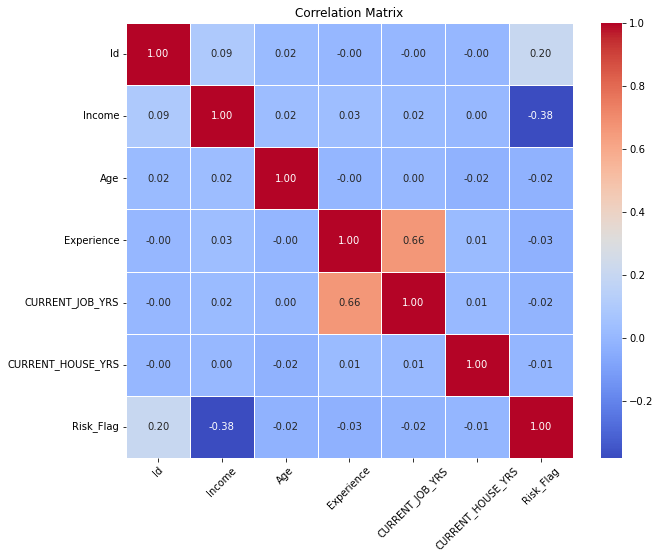

In [43]:
df = pd.concat([X_train, y_train], axis=1)

# Calculate correlation matrix
correlation_matrix = df.corr()

print("Correlation Matrix:")
#print(correlation_matrix)
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming correlation_matrix is the correlation matrix calculated earlier

# Plot correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

# Implementing random forest

## Making a node

In [44]:
class Node():
    def __init__(self,feature_index = None, threshold=None , left = None , right = None,info_gain = None , value=None):
    
        # for making decision
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.info_gain = info_gain
         
        # for leaf node 
        self.value = value
        

## Tree class

In [45]:
import numpy as np

class DecisionTreeClassifier():
    def __init__(self, min_samples_split=3, max_depth=3):
        ''' constructor '''
        
        # initialize the root of the tree 
        self.root = None
        
        # stopping conditions
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        
    def build_tree(self, dataset, features_to_use, curr_depth=0):
        ''' recursive function to build the tree ''' 
        
        X, Y = dataset[:,:-1], dataset[:,-1]
        num_samples, num_features = np.shape(X)
        
        # split until stopping conditions are met
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            # find the best split
            best_split = self.get_best_split(dataset, num_samples, features_to_use)
            
            # check if information gain is positive
            if best_split["info_gain"]>0:
                # recur left
                left_subtree = self.build_tree(best_split["dataset_left"], features_to_use, curr_depth+1)
                # recur right
                right_subtree = self.build_tree(best_split["dataset_right"], features_to_use, curr_depth+1)
                # return decision node
                return Node(best_split["feature_index"], best_split["threshold"], 
                            left_subtree, right_subtree, best_split["info_gain"])
        
        # compute leaf node
        leaf_value = self.calculate_leaf_value(Y)
        # return leaf node
        return Node(value=leaf_value)
    
    def get_best_split(self, dataset, num_samples, features_to_use):
        ''' function to find the best split '''
            
        best_split ={}
        max_info_gain = -float("inf")
        best_split["info_gain"] = max_info_gain
        
        for feature_index in features_to_use:
            
            # Extract feature values from the dataset
            feature_values = dataset[:, feature_index]
            # Calculate the number of unique feature values
            num_unique_values = len(np.unique(feature_values))
            # If number of unique feature values is more than 100, choose 100 randomly, else choose all
            if num_unique_values > 100:
                # Randomly select 100 unique feature values from the dataset
                possible_thresholds = np.unique(np.random.choice(feature_values, size=100, replace=False))
            else:
                # Use all unique feature values
                possible_thresholds = np.unique(feature_values)
            
            # loop over all the feature values present in the data
            for threshold in possible_thresholds:
                # get current split
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                # check if childs are not null
                if len(dataset_left)>0 and len(dataset_right)>0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    # compute information gain
                    curr_info_gain = self.information_gain(y, left_y, right_y, "gini")
                    # update the best split if needed
                    if curr_info_gain>max_info_gain:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["info_gain"] = curr_info_gain
                        max_info_gain = curr_info_gain
                        
        # return best split
        return best_split
    
    def split(self, dataset, feature_index, threshold):
        ''' function to split the data '''
        
        dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])
        return dataset_left, dataset_right
    
    def information_gain(self, parent, l_child, r_child, mode="entropy"):
        ''' function to compute information gain '''
        
        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        if mode=="gini":
            gain = self.gini_index(parent) - (weight_l*self.gini_index(l_child) + weight_r*self.gini_index(r_child))
        else:
            gain = self.entropy(parent) - (weight_l*self.entropy(l_child) + weight_r*self.entropy(r_child))
        return gain
    
    def entropy(self, y):
        ''' function to compute entropy '''
        
        class_labels = np.unique(y)
        entropy = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            entropy += -p_cls * np.log2(p_cls)
        return entropy
    
    def gini_index(self, y):
        ''' function to compute gini index '''
        
        class_labels = np.unique(y)
        gini = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            gini += p_cls**2
        return 1 - gini
        
    def calculate_leaf_value(self, Y):
        ''' function to compute leaf node '''
        
        Y = list(Y)
        return max(Y, key=Y.count)
    
    def print_tree(self, tree=None, indent=" "):
        ''' function to print the tree '''
        
        if not tree:
            tree = self.root

        if tree.value is not None:
            print(tree.value)

        else:
            print("X_"+str(tree.feature_index), "<=", tree.threshold, "?", tree.info_gain)
            print("%sleft:" % (indent), end="")
            self.print_tree(tree.left, indent + indent)
            print("%sright:" % (indent), end="")
            self.print_tree(tree.right, indent + indent)
    
    def fit(self, X, Y, features_to_use):
        ''' function to train the tree '''
        
        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.build_tree(dataset, features_to_use)
    
    def predict(self, X):
        ''' function to predict new dataset '''
        
        preditions = [self.make_prediction(x, self.root) for x in X]
        return preditions
    
    def make_prediction(self, x, tree):
        ''' function to predict a single data point '''
        
        if tree.value!=None:
            return tree.value
        feature_val = x[tree.feature_index]
        if feature_val<=tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)
        
        
# extra functions        
def bootstrap_feature(num_of_feature,num):
    # Generate 3 non-repetitive random numbers from 0 to 5
    random_numbers = random.sample(range(num_of_feature),  int(num) )
    return random_numbers

def bootstrap_sample(x, y, num_samples):
    # Ensure x and y have the same number of samples
    assert len(x) == len(y), "x and y must have the same number of samples"

    # Get the number of samples in x
    num_samples_total = len(x)

    # Generate random indices for the bootstrap sample
    indices = np.random.choice(num_samples_total, size=num_samples, replace=True)

    # Use the indices to select samples from x and y
    x_new = x.iloc[indices]  # Use iloc for DataFrame indexing
    y_new = y.iloc[indices]  # Use iloc for DataFrame indexing

    return x_new, y_new

## Taking input

In [46]:
X_train = pd.read_csv("./Csv Files/Train_X.csv")
Y_train = pd.read_csv("./Csv Files/Train_Y.csv")
X_test = pd.read_csv("./Csv Files/test_x.csv")
Y_test = pd.read_csv("./Csv Files/test_y.csv")
X_test = X_test.to_numpy()
Y_test=Y_test.to_numpy().flatten() 

In [47]:


# Assuming Y_test is your numpy array
unique_values, value_counts = np.unique(Y_test, return_counts=True)
value_counts_dict = dict(zip(unique_values, value_counts))
print("Value counts in Y_test:", value_counts_dict)

# Assuming Y_test is your numpy array
unique_values, value_counts = np.unique(Y_train, return_counts=True)
value_counts_dict = dict(zip(unique_values, value_counts))
print("Value counts in Y_train:", value_counts_dict)

Value counts in Y_test: {0: 1753, 1: 1738}
Value counts in Y_train: {0: 15699, 1: 15714}


# Running Model  and ensembling trees

### Bootstraping of features and sample is done as it may take several hours for make a decision tree on very large scale data set
### We have taken trees = 20 because after a increasing further we can not see any significant change in performance as the individual tree performance is also not going beyond a certain point as combination of different features are almost taken in this trees

## On Training samples

enter number of tress :- 20
tree  0  :- 

tree  1  :- 

tree  2  :- 

tree  3  :- 

tree  4  :- 

tree  5  :- 

tree  6  :- 

tree  7  :- 

tree  8  :- 

tree  9  :- 

tree  10  :- 

tree  11  :- 

tree  12  :- 

tree  13  :- 

tree  14  :- 

tree  15  :- 

tree  16  :- 

tree  17  :- 

tree  18  :- 

tree  19  :- 

Accuracy =  68.60853786648839 %
F1 Score: 0.7031339374416714
Confusion Matrix:
[[ 9874  5825]
 [ 4036 11678]]


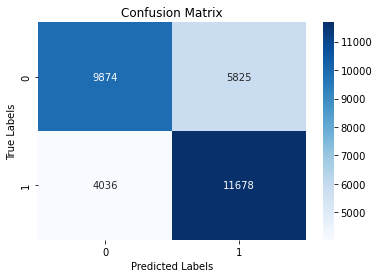

In [48]:
 

tree = int(input("enter number of tress :- "))

Y_pred = np.zeros(X_test.shape[0]) 
for i in range(tree):

    X_train1 , Y_train1 = bootstrap_sample(X_train,Y_train,10000)
    features_to_use = bootstrap_feature(X_train.shape[1],int(X_train.shape[1]*0.6))
    classifier = DecisionTreeClassifier(min_samples_split=50, max_depth=3)
    classifier.fit(X_train1,Y_train1,features_to_use)

    print("tree ",i ," :- \n")
    #classifier.print_tree()
    #print("\n\n")
    
    x_train = X_train.to_numpy()
    Y_pred_iteration = np.array(classifier.predict(x_train))
    Y_pred = np.sum([Y_pred, Y_pred_iteration], axis=0) if i > 0 else Y_pred_iteration

    
# here all tree votes for 0 / 1 and final class is predicted by majority among trees

Y_predicted = np.where(Y_pred >= float(float(tree)/2.0), 1, 0)
print("Accuracy = ",accuracy_score(Y_train, Y_predicted)*100,"%")

# Calculate the F1 score
f1 = f1_score(Y_train, Y_predicted)
print("F1 Score:", f1)

# Compute the confusion matrix
cm = confusion_matrix(Y_train, Y_predicted)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()





## On Testing data

enter number of tress :- 20
tree  0  :- 

tree  1  :- 

tree  2  :- 

tree  3  :- 

tree  4  :- 

tree  5  :- 

tree  6  :- 

tree  7  :- 

tree  8  :- 

tree  9  :- 

tree  10  :- 

tree  11  :- 

tree  12  :- 

tree  13  :- 

tree  14  :- 

tree  15  :- 

tree  16  :- 

tree  17  :- 

tree  18  :- 

tree  19  :- 

Accuracy =  69.37840160412489 %
F1 Score: 0.7091156462585032
Confusion Matrix:
[[1119  634]
 [ 435 1303]]


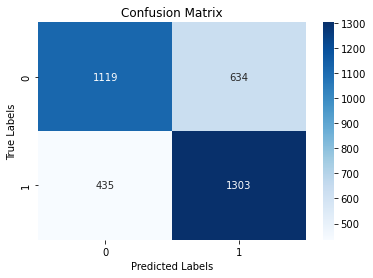

In [49]:


tree = int(input("enter number of tress :- "))

Y_pred = np.zeros(X_test.shape[0]) 
for i in range(tree):

    X_train1 , Y_train1 = bootstrap_sample(X_train,Y_train,10000)
    features_to_use = bootstrap_feature(X_train.shape[1],int(X_train.shape[1]*0.6))
    classifier = DecisionTreeClassifier(min_samples_split=50, max_depth=3)
    classifier.fit(X_train1,Y_train1,features_to_use)

    print("tree ",i ," :- \n")
    #classifier.print_tree()
    #print("\n\n")
    
    Y_pred_iteration = np.array(classifier.predict(X_test))
    Y_pred = np.sum([Y_pred, Y_pred_iteration], axis=0) if i > 0 else Y_pred_iteration

    
# here all tree votes for 0 / 1 and final class is predicted by majority among trees
Y_predicted = np.where(Y_pred >= float(float(tree)/2.0), 1, 0)
print("Accuracy = ",accuracy_score(Y_test, Y_predicted)*100,"%")

# Calculate the F1 score
f1 = f1_score(Y_test, Y_predicted)
print("F1 Score:", f1)

# Compute the confusion matrix
cm = confusion_matrix(Y_test, Y_predicted)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()




# By other ensembling techinique (Testing data)

In [50]:
tree = int(input("enter number of tress :- "))
Y_pred = np.zeros(X_test.shape[0]) 

# Initialize an array to hold the weights of each tree
tree_weights = np.ones(tree) 
target_accuracy = 0.6  # Target accuracy

for i in range(tree):

    X_train1 , Y_train1 = bootstrap_sample(X_train,Y_train,10000)
    features_to_use = bootstrap_feature(X_train.shape[1],int(X_train.shape[1]*0.6))
    classifier = DecisionTreeClassifier(min_samples_split=50, max_depth=3)
    classifier.fit(X_train1,Y_train1,features_to_use)

    print("tree ",i ," :- \n")
    #classifier.print_tree()
    #print("\n\n")
    
    #Y_pred_iteration = np.array(classifier.predict(X_test))
    #Y_pred = np.sum([Y_pred, Y_pred_iteration], axis=0) if i > 0 else Y_pred_iteration
    
        # Evaluate the tree's performance on the test set
    Y_pred_iteration = np.array(classifier.predict(X_test))
    print("Y_pred_iteration",Y_pred_iteration)
    accuracy = np.mean(Y_pred_iteration == Y_test)  # Calculate accuracy
    
    # Update tree weights based on deviation from target accuracy
    deviation = accuracy - target_accuracy
    weight_multiplier = 1.0 / (1.0 + deviation)  # Decrease weight for larger deviation
    #if(deviation<0): 
    #    weight_multiplier = 2.0
    #else:
    #    weight_multiplier = 0.5
    tree_weights[i] *= weight_multiplier

    print("Tree ", i, " - Accuracy:", accuracy)
    
    # Accumulate predictions with updated weights
    if i == 0:
        Y_pred = Y_pred_iteration * tree_weights[i]
    else:
        Y_pred += Y_pred_iteration * tree_weights[i]
    print("Y_pred",Y_pred)

# Normalize predictions
Y_pred /= np.sum(tree_weights)
print("Y_pred",Y_pred)

enter number of tress :- 20
tree  0  :- 

Y_pred_iteration [0 0 1 ... 1 1 0]
Tree  0  - Accuracy: 0.6863362933256947
Y_pred [0.         0.         0.92052526 ... 0.92052526 0.92052526 0.        ]
tree  1  :- 

Y_pred_iteration [0 1 0 ... 1 0 1]
Tree  1  - Accuracy: 0.5276425093096534
Y_pred [0.         1.07800148 0.92052526 ... 1.99852674 0.92052526 1.07800148]
tree  2  :- 

Y_pred_iteration [0 0 0 ... 1 0 0]
Tree  2  - Accuracy: 0.5396734460040103
Y_pred [0.         1.07800148 0.92052526 ... 3.06272623 0.92052526 1.07800148]
tree  3  :- 

Y_pred_iteration [0 0 0 ... 1 0 0]
Tree  3  - Accuracy: 0.5393869951303352
Y_pred [0.         1.07800148 0.92052526 ... 4.12725023 0.92052526 1.07800148]
tree  4  :- 

Y_pred_iteration [0 0 0 ... 1 1 0]
Tree  4  - Accuracy: 0.6963620739043254
Y_pred [0.         1.07800148 0.92052526 ... 5.03935767 1.8326327  1.07800148]
tree  5  :- 

Y_pred_iteration [0 1 0 ... 1 0 0]
Tree  5  - Accuracy: 0.507877399026067
Y_pred [0.         2.17947179 0.92052526 ...

Accuracy =  62.67545116012604 %
F1 Score: 0.6936280272748648
Confusion Matrix:
[[ 713 1040]
 [ 263 1475]]


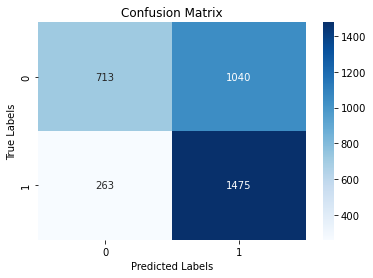

In [21]:
Y_predicted = np.where(Y_pred >= 0.5, 1, 0)
from sklearn.metrics import accuracy_score
print("Accuracy = ",accuracy_score(Y_test, Y_predicted)*100,"%")
print("F1 Score:", f1)

# Compute the confusion matrix
cm = confusion_matrix(Y_test, Y_predicted)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

from sklearn.metrics import f1_score



# Calculate the F1 score
f1 = f1_score(Y_test, Y_predicted)